In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
import scipy.interpolate as inter

In [3]:
phase_h, wavelength_hsiao, flux_hsiao = np.loadtxt('../data/info_files/hsiao_template.dat', unpack = True)

In [4]:
epoch_n, wavelength_nugent, flux_nugent = np.loadtxt('../data/info_files/nugent_templates.dat', unpack = True)

In [72]:
t_h, U_h, B_h, V_h, R_h, I_h, Y_h, J_h, H_h, K_h = np.loadtxt('../data/info_files/hsiao_lc_template.dat', unpack = True)

In [73]:
t_n, U_n, B_n, V_n, R_n, I_n, J_n, H_n, K_n = np.loadtxt('../data/info_files/nugent_light_curves.dat', unpack = True)

In [28]:
hsiao_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_h):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            hsiao_temps[float(phase_h[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_hsiao[i]]
        temp_flux = [flux_hsiao[i]]
    else:
        temp_wave.append(wavelength_hsiao[i])
        temp_flux.append(flux_hsiao[i])
    first = False

{0.0: [[1000.0, 1010.0, 1020.0, 1030.0, 1040.0, 1050.0, 1060.0, 1070.0, 1080.0, 1090.0, 1100.0, 1110.0, 1120.0, 1130.0, 1140.0, 1150.0, 1160.0, 1170.0, 1180.0, 1190.0, 1200.0, 1210.0, 1220.0, 1230.0, 1240.0, 1250.0, 1260.0, 1270.0, 1280.0, 1290.0, 1300.0, 1310.0, 1320.0, 1330.0, 1340.0, 1350.0, 1360.0, 1370.0, 1380.0, 1390.0, 1400.0, 1410.0, 1420.0, 1430.0, 1440.0, 1450.0, 1460.0, 1470.0, 1480.0, 1490.0, 1500.0, 1510.0, 1520.0, 1530.0, 1540.0, 1550.0, 1560.0, 1570.0, 1580.0, 1590.0, 1600.0, 1610.0, 1620.0, 1630.0, 1640.0, 1650.0, 1660.0, 1670.0, 1680.0, 1690.0, 1700.0, 1710.0, 1720.0, 1730.0, 1740.0, 1750.0, 1760.0, 1770.0, 1780.0, 1790.0, 1800.0, 1810.0, 1820.0, 1830.0, 1840.0, 1850.0, 1860.0, 1870.0, 1880.0, 1890.0, 1900.0, 1910.0, 1920.0, 1930.0, 1940.0, 1950.0, 1960.0, 1970.0, 1980.0, 1990.0, 2000.0, 2010.0, 2020.0, 2030.0, 2040.0, 2050.0, 2060.0, 2070.0, 2080.0, 2090.0, 2100.0, 2110.0, 2120.0, 2130.0, 2140.0, 2150.0, 2160.0, 2170.0, 2180.0, 2190.0, 2200.0, 2210.0, 2220.0, 2230.0, 

In [35]:
nug_temps = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps[float(epoch_n[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent[i]]
        temp_flux = [flux_nugent[i]]
    else:
        temp_wave.append(wavelength_nugent[i])
        temp_flux.append(flux_nugent[i])
    first = False

In [38]:
wave_h = hsiao_temps[0.][0]
flux_h = hsiao_temps[0.][1]

In [6]:
wave_interp_h = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h = inter.splrep(wave_h, flux_h)
flux_interp_h = inter.splev(wave_interp_h, flux_spl_h, ext = 3)
h_template = composite.supernova(wave_interp_h, flux_interp_h)
h_template.phase_array = np.zeros(len(flux_interp_h))

In [39]:
wave_n = nug_temps[0.][0]
flux_n = nug_temps[0.][1]

In [8]:
wave_interp_n = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n = inter.splrep(wave_n, flux_n)
flux_interp_n = inter.splev(wave_interp_n, flux_spl_n, ext = 3)
n_template = composite.supernova(wave_interp_n,flux_interp_n)
n_template.phase_array = np.zeros(len(flux_interp_n))

In [9]:
query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'"]

In [10]:
composites, sn_arrays, boot_sn_arrays = query_db.main(len(query), query, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1
157 questionable files currently ignored
147 spectra found
157 questionable files currently ignored
6 questionable spectra removed 141 spectra left
3 Peculiar Ias removed 138 spectra left
99 SNs with host corrections
Arrays cleaned
157 questionable files currently ignored
1 spectra with nan ivars removed 98 spectra left
1991bg sn1991bg-19911213-noz.flm 64.7109206589 None 1.88326464208 0.681687715271 0.003392 bsnip 48603.0 3340.0 8602.0 3.0
Host correction...
1994s sn1994s-19940616-uoi.flm 34.8971198257 0.94 None 0.998840596273 0.015177 bsnip 49519.338 3124.0 11082.0 11.0
Host correction...
1998dk sn1998dk-19980831-ui.flm 70.6132013702 1.05 None -0.728371655089 0.013219 bsnip 51056.305 3308.0 10018.0 14.0
Host correction...
1998es sn1998es-19981125-ui-corrected.flm 69.1436677309 0.85 None 0.496750833938 0.010567 bsnip 51142.252 3346.0 10044.0 8.0
Host correction...
19

In [11]:
query_db.set_min_num_spec(composites, 5)

In [12]:
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template)
comps_and_temps.append(n_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

In [13]:
import magnitudes as mag
import pyphot

In [16]:
from pyphot.vega import Vega
vega = Vega()
lib = pyphot.get_library()
f = lib['GROUND_JOHNSON_B']
# compute the integrated flux through the filter f
# note that it work on many spectra at once
fluxes = f.get_flux(vega.wavelength, vega.flux, axis=-1)
# convert to vega magnitudes
mags = -2.5 * np.log10(fluxes) - f.Vega_zero_mag
print("Vega magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.AB_zero_mag
print("AB magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.ST_zero_mag
print("ST magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))

Vega magnitude of Vega in GROUND_JOHNSON_B is : 0.000000 mag
AB magnitude of Vega in GROUND_JOHNSON_B is : -0.074212 mag
ST magnitude of Vega in GROUND_JOHNSON_B is : -0.587021 mag


In [17]:
lib = pyphot.get_library()
B = lib['GROUND_JOHNSON_B']
V = lib['GROUND_JOHNSON_V']
hsiao_fluxB = B.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_fluxV = V.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.Vega_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.Vega_zero_mag
print hsiao_magB, hsiao_magV
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.AB_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.AB_zero_mag
print hsiao_magB, hsiao_magV

-0.0387656219521 0.0423946332271
-0.112977534603 0.0345530104216


In [93]:
hsiao_B = []
hsiao_V = []
i=-20.
phases_h = []
while i <= np.amax(hsiao_temps.keys()):
    Bflux = B.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    hsiao_B.append(Bmag)
    hsiao_V.append(Vmag)
    phases_h.append(i)
    i+=1

In [94]:
nug_B = []
nug_V = []
i=-20.
phases_n = []
while i <= np.amax(nug_temps.keys()):
    Bflux = B.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    nug_B.append(Bmag)
    nug_V.append(Vmag)
    phases_n.append(i)
    i+=1

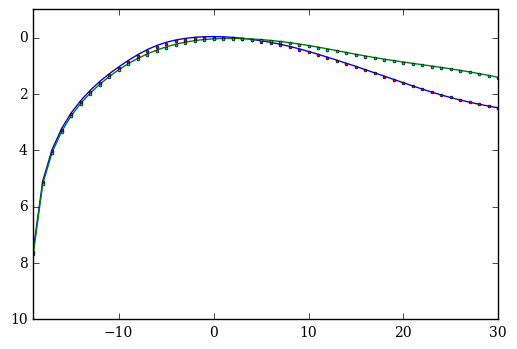

In [95]:
plt.plot(phases_h, hsiao_B)
plt.plot(phases_h, hsiao_V)
plt.plot(t_h, B_h, 'o', markersize=2)
plt.plot(t_h, V_h, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

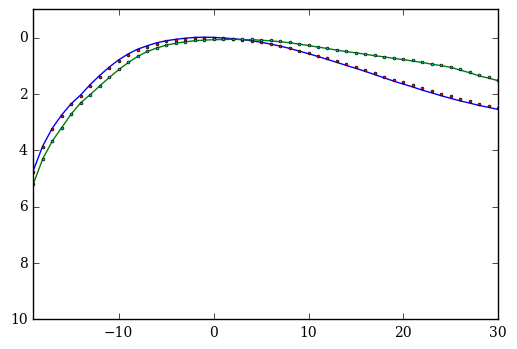

In [96]:
plt.plot(phases_n, nug_B)
plt.plot(phases_n, nug_V)
plt.plot(t_n, B_n, 'o', markersize=2)
plt.plot(t_n, V_n, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

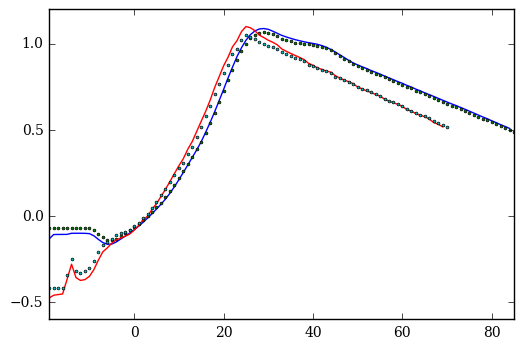

In [97]:
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V))
plt.plot(t_h, np.asarray(B_h) - np.asarray(V_h), 'o', markersize=2)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V))
plt.plot(t_n, np.asarray(B_n) - np.asarray(V_n), 'o', markersize=2)
plt.xlim([-19,85])
plt.show()

In [124]:
#changeable phase bin size
query_strings_all = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10."]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    query_strings_all.append("SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= %f and phase < %f"% (p1,p2))
    p1 += k
    p2 += k
print query_strings_all

['SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10.', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10.000000 and phase < -8.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8.000000 and phase < -6.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -6.000000 and phase < -4.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -4.000000 and phase < -2.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 0.000000 and phase < 2.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 2.000000 and phase < 4.000000', 'SELECT

In [130]:
query_strings_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10. and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'"]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    query_strings_dm15.append("SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= %f and phase < %f and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'"% (p1,p2))
    p1 += k
    p2 += k
print query_strings_dm15

["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10. and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'", "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'", "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8.000000 and phase < -6.000000 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'", "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -6.000000 and phase < -4.000000 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN

In [125]:
composites_all, sn_arrays_all, boot_sn_arrays_all = query_db.main(len(query_strings_all), query_strings_all, boot='nb', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10.
ERROR:  sn2006oa-20061116-not.dat None
157 questionable files currently ignored
42 spectra found
157 questionable files currently ignored
1 questionable spectra removed 41 spectra left
0 Peculiar Ias removed 41 spectra left
34 SNs with host corrections
Arrays cleaned
157 questionable files currently ignored
0 spectra with nan ivars removed 34 spectra left
1994d sn1994D-19940310.36-mmt.flm 61.6257187727 1.37 None -11.2029443405 0.002058 cfa 49421.36 3206.0 8994.0 8.0
Host correction...
1998dm sn1998dm-19980824-br-corrected.flm 51.0043910963 0.9 None -11.7372967656 0.006535 bsnip 51049.506 3330.0 9986.0 14.0
Host correction...
1999aa sn1999aa-19990212-uoi.flm 32.5387670237 0.78 None -10.36233677 0.014443 bsnip 51221.258 3304.0 10302.0 14.0
Host correction...
2002bo sn2002bo-20020311-ui-corrected.flm 23.7473268028 1.08 None -12.5388353382 0.00424 bsnip 52344.26 3338.0 10308.0 None
H

In [131]:
composites_dm15, sn_arrays_dm15, boot_sn_arrays_dm15 = query_db.main(len(query_strings_dm15), query_strings_dm15, boot='nb', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10. and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'
157 questionable files currently ignored
17 spectra found
157 questionable files currently ignored
0 questionable spectra removed 17 spectra left
0 Peculiar Ias removed 17 spectra left
16 SNs with host corrections
Arrays cleaned
157 questionable files currently ignored
0 spectra with nan ivars removed 16 spectra left
2002bo sn2002bo-20020311-ui-corrected.flm 23.7473268028 1.08 None -12.5388353382 0.00424 bsnip 52344.26 3338.0 10308.0 None
Host correction...
2003kc sn2003kc-20031123-ui.flm 10.1586092055 None 1.1265951925 -10.4309430339 0.033176 bsnip 52966.508 3246.0 10018.0 None
Host correction...
2005cf sn2005cf-20050601.385-ui.flm 1.54511 1.1 None -10.8727511548 0.006461 bsnip 53522.385 3340.0 10434.0 8.0
Host correction...
2006qo sn2006qo-20061201

In [126]:
comp_phases = []
comp_B = []
comp_V = []
query_db.set_min_num_spec(composites_all, 5)
for comp in composites_all:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B.append(Bmag)
    comp_V.append(Vmag)
    comp_phases.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases
print comp_B
print comp_V

[-11.401826914409666, -8.7399249515667226, -7.2402877930658081, -5.1099838471611498, -3.0856670262484327, -1.0943138844676923, 1.1261280429654539, 2.950511174758411, 4.7228583875767232, 6.7895514256341611, 8.6886606463633154, 10.850037021348472, 13.021305258408075, 15.003800425006785, 17.157147384350459, 18.809570503239165, 21.27432181889494, 23.336235886271655, 25.088700885842016, 27.315406892396808, 29.036381941911255, 30.918800369265067, 32.8077038261357, 35.065782955785231, 36.738943226540719, 38.878490535610716, 40.725306323662267, 43.012851033571032, 44.853523024112157, 47.086587912598596, 49.087011916967356, 51.174411655954238, 53.157942726759131, 55.271769151149634, 57.082780260221782, 58.757193391425822]
[-20.074806712989695, -20.05423390326246, -19.979646680571697, -20.035706604460696, -20.073923097493346, -20.054273831752315, -20.075802826373508, -20.139727644015579, -20.082666814790347, -20.20559158946401, -20.096185712942219, -20.071879240536482, -19.934090653535488, -19.8

In [133]:
comp_phases_dm15 = []
comp_B_dm15 = []
comp_V_dm15 = []
query_db.set_min_num_spec(composites_dm15, 5)
for comp in composites_dm15:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B_dm15.append(Bmag)
    comp_V_dm15.append(Vmag)
    comp_phases_dm15.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases_dm15
print comp_B_dm15
print comp_V_dm15

[-11.336519488669083, -8.7884751552130602, -7.0985564967137291, -5.0416444302672989, -3.0668396738491297, -1.1344442738328566, 0.99593428778179305, 3.0782136211595859, 4.7432969830522964, 6.9432509528192918, 8.5949780470537469, 10.867791145107232, 12.895957612452037, 15.216218776859828, 17.20365124395752, 18.813399704358972, 21.104805058779966, 23.055510289778582, 24.861631923131114, 27.252764885191024, 29.013072680293984, 30.944902366212265, 32.468193586494664, 35.064162412657907, 36.701406881849053, 38.60973193191284, 40.718666326022031, 43.32816326469441, 44.599431016257022, 47.022862080406718, 49.13684298581731, 51.26282258908045, 52.960150285041117, 54.490738847320173, 56.688036709976636, 58.778027964621785]
[-20.029672842634739, -20.025057927798333, -19.948030187376887, -19.999040470602726, -20.003303342870684, -20.012038878712591, -20.015078610542652, -20.052007387104421, -20.059423954881652, -20.041339622495272, -20.118433206309252, -20.031874038505759, -19.964074526263897, -19

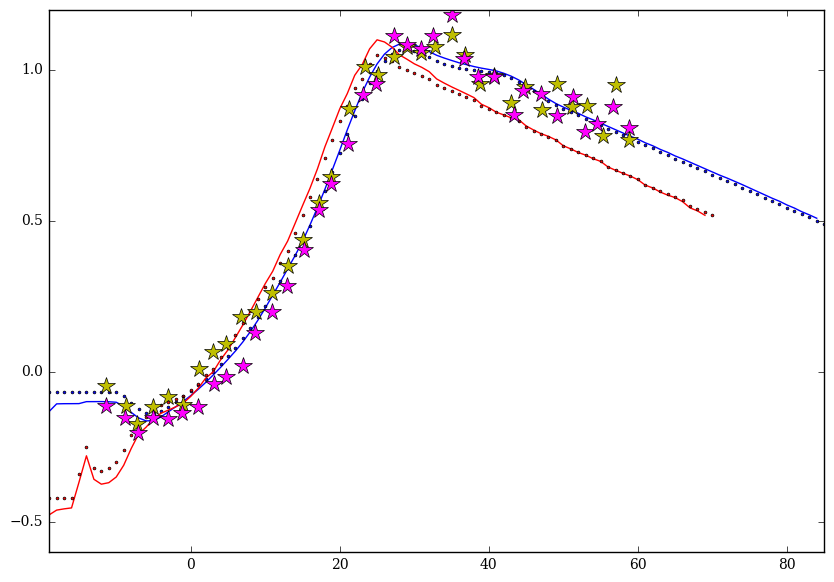

In [139]:
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V), 'b')
plt.plot(t_h, np.asarray(B_h) - np.asarray(V_h), 'bo', markersize=2)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V), 'r')
plt.plot(t_n, np.asarray(B_n) - np.asarray(V_n), 'ro', markersize=2)
plt.plot(comp_phases, np.asarray(comp_B) - np.asarray(comp_V), '*', markersize=13, color = 'y')
plt.plot(comp_phases_dm15, np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15), '*', markersize=13, color = 'magenta')
plt.xlim([-19,85])
plt.show()

1.17027706437
1.0602948195


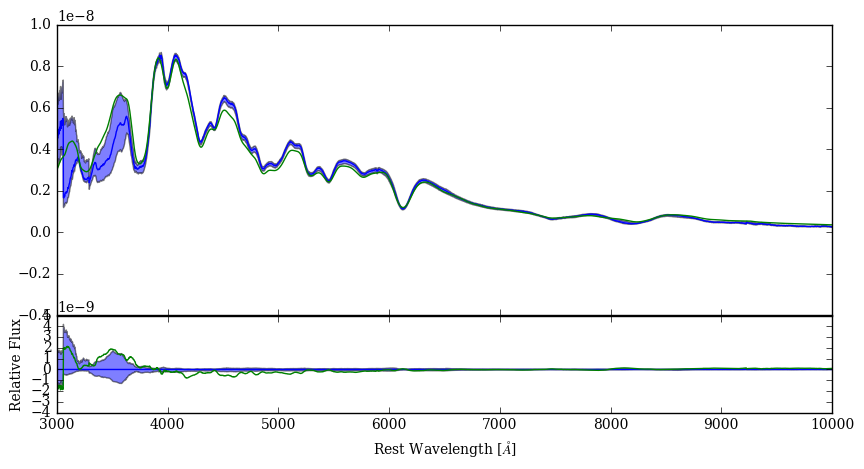

In [20]:
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2]])

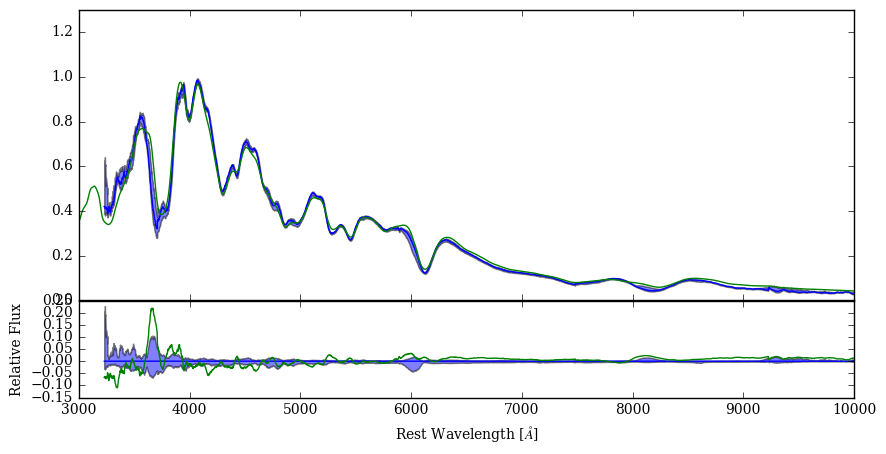

In [232]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2]])

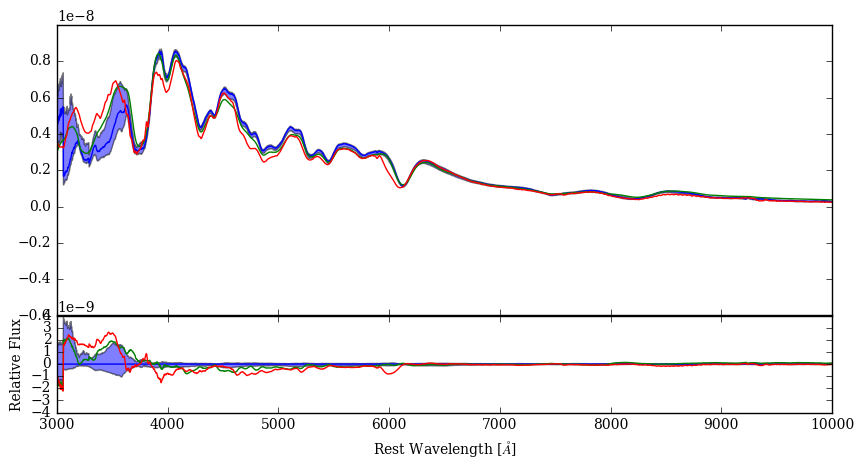

In [260]:
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3]])

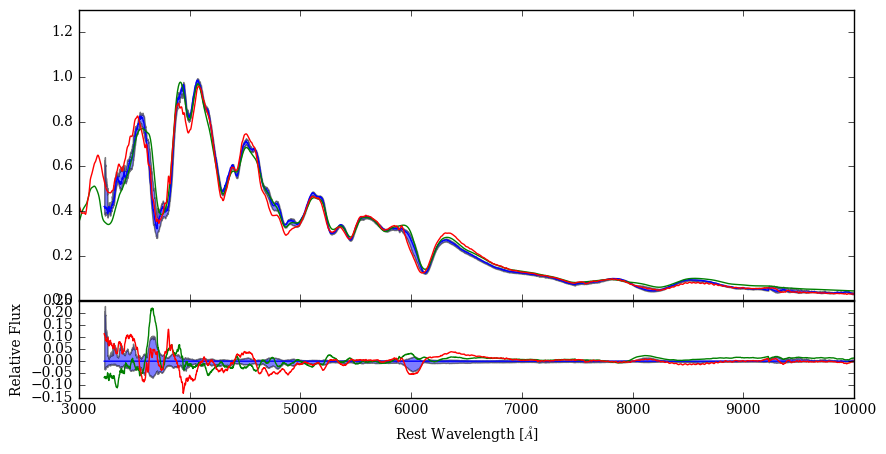

In [201]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3]])

In [115]:
wave_h_1week = []
flux_h_1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == 7.0:
        wave_h_1week.append(wavelength_h[i])
        flux_h_1week.append(flux_h[i])

In [116]:
wave_interp_h_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1week = inter.splrep(wave_h_1week, flux_h_1week)
flux_interp_h_1week = inter.splev(wave_interp_h_1week, flux_spl_h_1week, ext = 3)
h_template_1week = composite.supernova(wave_interp_h_1week, flux_interp_h_1week)
h_template_1week.phase_array = np.zeros(len(flux_interp_h_1week))

In [168]:
wave_n_1week = []
flux_n_1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 27.0:
        wave_n_1week.append(wavelength_n[i])
        flux_n_1week.append(flux_n[i])

In [169]:
wave_interp_n_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1week = inter.splrep(wave_n_1week, flux_n_1week)
flux_interp_n_1week = inter.splev(wave_interp_n_1week, flux_spl_n_1week, ext = 3)
n_template_1week = composite.supernova(wave_interp_n_1week,flux_interp_n_1week)
n_template_1week.phase_array = np.zeros(len(flux_interp_n_1week))

In [131]:
query_1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 6 and phase < 8",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1. and dm15_source < 1.2) or (dm15_from_fits >= 1. and dm15_from_fits < 1.2)) and Supernovae.SN !='2002bf'"]

In [132]:
composites_1week, sn_arrays_1week, boot_sn_arrays_1week = query_db.main(len(query_1week), query_1week, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 6 and phase < 8
157 questionable files currently ignored
140 spectra found
157 questionable files currently ignored
10 questionable spectra removed 130 spectra left
2 Peculiar Ias removed 128 spectra left
101 SNs with host corrections
Arrays cleaned
157 questionable files currently ignored
4 spectra with nan ivars removed 97 spectra left
1990n sn1990n-19900717-oi.flm 70.7641563691 None 0.88901820492 7.33808719397 0.003395 bsnip 48089.0 3958.0 9790.0 13.0
Host correction...
1991t sn1991t-19910505.flm 83.1866164841 None 0.831468991816 7.23907849643 0.005791 bsnip 48381.0 3144.0 9752.0 13.0
Host correction...
1997bp sn1997bp-19970416-uoi.flm 45.3984985531 1.08 None 6.22327216179 0.008312 bsnip 50554.451 3184.0 10334.0 None
Host correction...
1998v sn1998v-19980326-br.flm 83.5622224849 0.99 None 7.39102149597 0.017586 bsnip 50898.638 3834.0 8992.0 12.0
Host correction...
1999cl sn1999cl-

In [171]:
query_db.set_min_num_spec(composites_1week, 5)

In [194]:
comps_and_temps = []
for comp in composites_1week:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template_1week)
comps_and_temps.append(n_template_1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

1.13715719936
1.09965433972


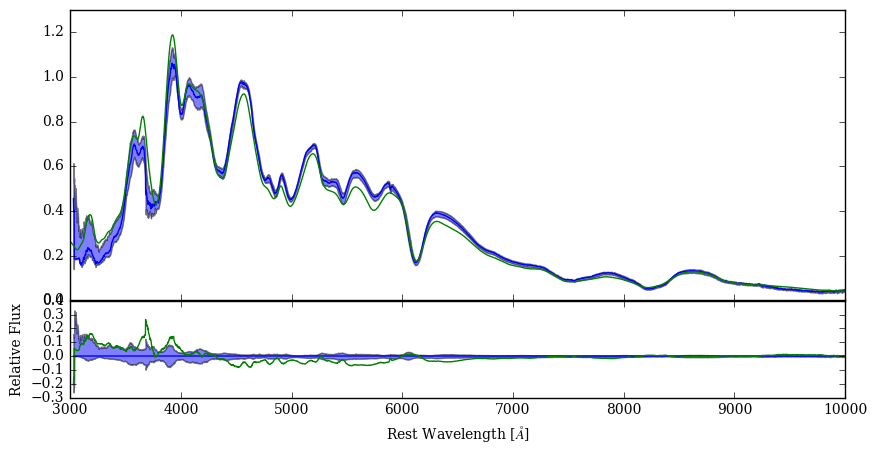

In [195]:
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2]])

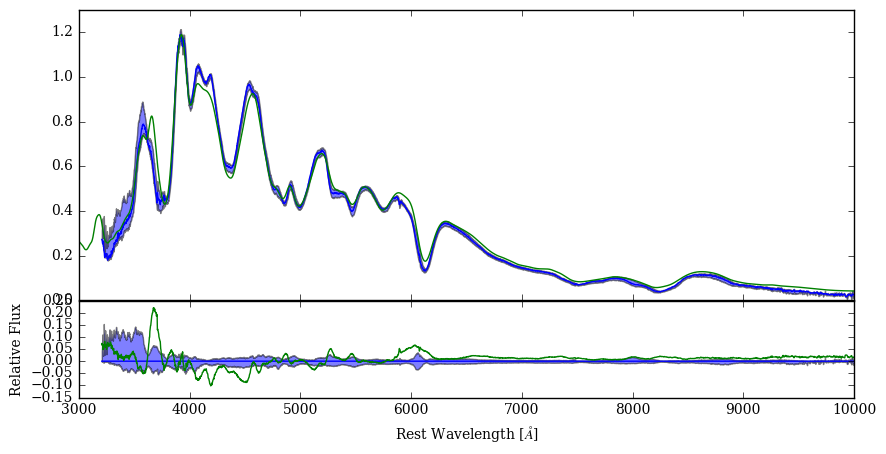

In [196]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2]])

In [137]:
wave_h_m1week = []
flux_h_m1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == -7.0:
        wave_h_m1week.append(wavelength_h[i])
        flux_h_m1week.append(flux_h[i])

In [138]:
wave_interp_h_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_m1week = inter.splrep(wave_h_m1week, flux_h_m1week)
flux_interp_h_m1week = inter.splev(wave_interp_h_m1week, flux_spl_h_m1week, ext = 3)
h_template_m1week = composite.supernova(wave_interp_h_m1week, flux_interp_h_m1week)
h_template_m1week.phase_array = np.zeros(len(flux_interp_h_m1week))

In [148]:
query_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8 and phase < -6",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -8 and phase <= -6 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'"]

In [149]:
composites_m1week, sn_arrays_m1week, boot_sn_arrays_m1week = query_db.main(len(query_m1week), query_m1week, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8 and phase < -6
157 questionable files currently ignored
96 spectra found
157 questionable files currently ignored
3 questionable spectra removed 93 spectra left
1 Peculiar Ias removed 92 spectra left
66 SNs with host corrections
Arrays cleaned
157 questionable files currently ignored
1 spectra with nan ivars removed 65 spectra left
1994d sn1994d-19940313.flm 123.405435199 1.37 None -7.92568893218 0.002058 bsnip 49424.644 3284.0 8732.0 8.0
Host correction...
1998dk sn1998dk-19980824-90-br.flm 28.9891747848 1.05 None -7.42682480293 0.013219 bsnip 51049.518 3308.0 9920.0 14.0
Host correction...
1999dk sn1999dk-19990817-ui.flm 55.0112411584 None 0.893643877201 -6.86135414204 0.01496 bsnip 51407.376 3342.0 10346.0 14.0
Host correction...
2001eh sn2001eh-20010911-ui.flm 17.5454059317 0.92 None -6.28907771765 0.037036 bsnip 52163.263 3234.0 9980.0 12.0
Host correction...
2002cr sn2002cr-

In [183]:
query_db.set_min_num_spec(composites_m1week, 5)
comps_and_temps = []
for comp in composites_m1week:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template_m1week)
comps_and_temps.append(h_template_m1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

dm15:
1.13753995484
1.05539523848
phase:
-7.24248709828
-7.09855649671


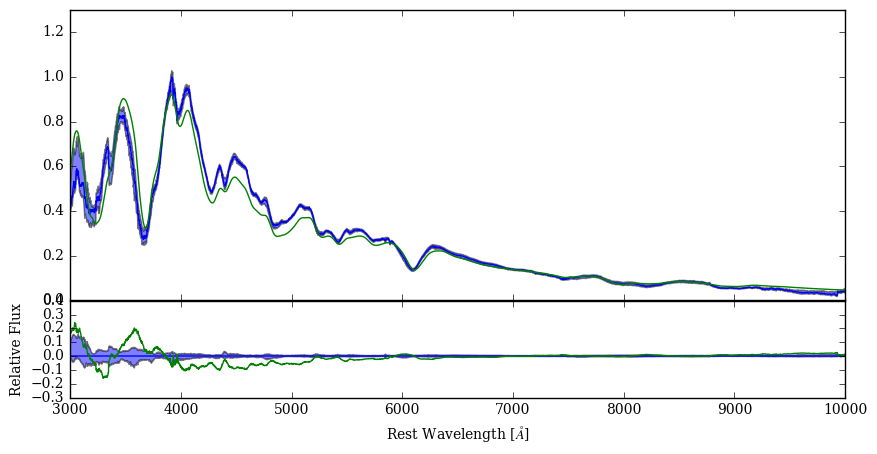

In [189]:
print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2]])

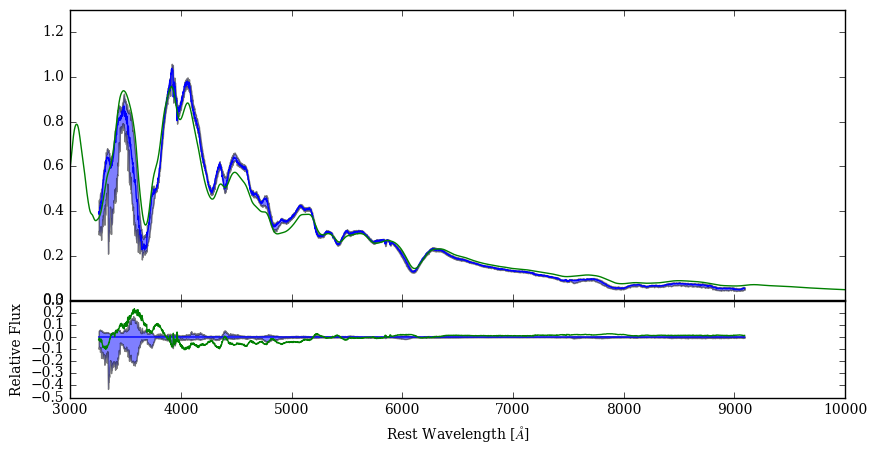

In [188]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2]])

In [153]:
wave_h_1month = []
flux_h_1month = []
for i, phase in enumerate(phase_h):
    if float(phase) == 30.0:
        wave_h_1month.append(wavelength_h[i])
        flux_h_1month.append(flux_h[i])

In [154]:
wave_interp_h_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1month = inter.splrep(wave_h_1month, flux_h_1month)
flux_interp_h_1month = inter.splev(wave_interp_h_1month, flux_spl_h_1month, ext = 3)
h_template_1month = composite.supernova(wave_interp_h_1month, flux_interp_h_1month)
h_template_1month.phase_array = np.zeros(len(flux_interp_h_1month))

In [155]:
query_1month = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 28 and phase <= 32 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'"]

In [156]:
composites_1month, sn_arrays_1month, boot_sn_arrays_tmonth = query_db.main(len(query_1month), query_1month, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32
ERROR:  2002bo_20020421_0_2_00.dat None
157 questionable files currently ignored
119 spectra found
157 questionable files currently ignored
2 questionable spectra removed 117 spectra left
3 Peculiar Ias removed 114 spectra left
95 SNs with host corrections
Arrays cleaned
157 questionable files currently ignored
2 spectra with nan ivars removed 93 spectra left
1991m sn1991m-19910419-final.flm 55.1191897898 None 1.22016841445 29.715011889 0.007235 bsnip 48365.0 3922.0 6900.0 14.0
Host correction...
1991s sn1991s-19910505-final.flm 0.01639535 None 0.997715648132 31.8629659169 0.054453 bsnip 48381.0 3750.0 6590.0 19.0
Host correction...
1993ac sn1993ac-19931108-ui.flm 4.28132103463 1.19 None 28.4747378456 0.049 bsnip 49299.28 3120.0 9484.0 None
Host correction...
1994d sn1994d-19940420.flm 44.924309615 1.37 None 29.3535903111 0.002058 bsnip 49462.0 3254.0 10130.0 8.0
Ho

In [191]:
query_db.set_min_num_spec(composites_1month, 5)
comps_and_temps = []
for comp in composites_1month:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template_1month)
comps_and_temps.append(h_template_1month)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

dm15:
1.12316794367
1.03941109554
phase:
29.689041285
29.6234733777


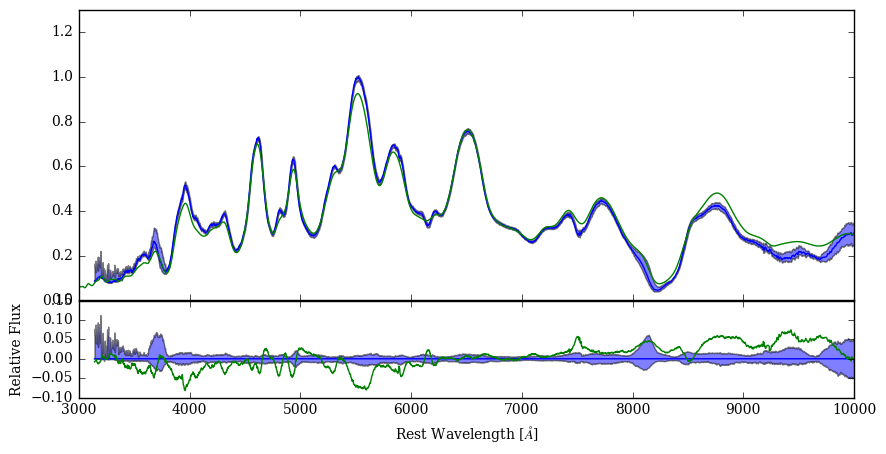

In [192]:
print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2]])

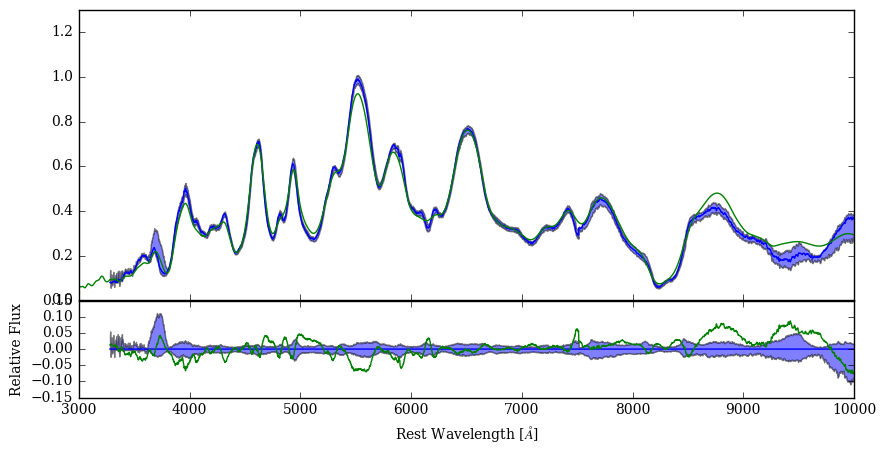

In [193]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2]])